# Biodiversity in U.S. National Parks

#### Collaborators
* Jared Schober: 3036333806
* Dominic Fusco: 3037422192

#### Introduction

The US national park system consists of over 400 recognized areas within the territorial boundaries of the United States administered by the National Park Service, which “partners with local communities to assist in historic preservation and the creation and maintenance of recreational spaces.” While Yellowstone was established as the first national park nearly 150 years ago in 1872, the National Park Service (NPS) did not form as an official government agency until half a century later in 1916. The NPS has since growing to steward over 85 million acres in the United States. 

The national park system has been hailed as a progressive and trailblazing institution in the fields of conservation and preservation, though today faces many challenges in succeeding in its various missions in this respect. A centennial conference among scholars in 2016 describe how “parks and protected areas worldwide are under increasing threat from a variety of factors, including storms and fires of greater severity, plant and animal extinctions, the changing attitudes of a public that has become more urbanized, and the political pressures of narrow special interest groups.”  Furthermore, because much of the national park system resides in the arctic regions of Alaska, scholars find that “climate change exposes the national park area more than the US as a whole.”   

It is clear that different national parks are impacted differently by the challenges of climate change and other environmental and political issues of the 21st century. As such, we choose to work with data on animal and plant species in the national parks, published openly by the National Park Service, to explore what features of parks themselves contribute to these varying degrees of vulnerability. Our research question can thusly be posed as: **what features of United States national parks contribute to threats on localy biodiversity as defined by risk of species endangerment**?

#### Importing Packages

In [1]:
from utils import *
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import zipfile
import os
from ds100_utils_grad_proj import *
from feature_func import *
from sklearn import linear_model as lm
from IPython.display import Markdown

### Downloading the Data

In [2]:
parks_g_id = '1o7AQjU8y0lIL0SPtEeCiosISttuZmXID'
parks_name = 'national_parks_biodiversity_parks.csv'
fetch_and_cache_gdrive(parks_g_id, parks_name)

parks_species_id = '1UhjRe0dCStMkBQ17x-yFbmYaSx8dOz3E'
parks_species_name = 'national_parks_biodiversity_species.csv'
fetch_and_cache_gdrive(parks_species_id, parks_species_name)

Using cached version that was downloaded (UTC): Thu Nov 10 23:58:49 2022
Using cached version that was downloaded (UTC): Fri Nov 11 00:00:17 2022


PosixPath('data/national_parks_biodiversity_species.csv')

In [3]:
parks = pd.read_csv('data/national_parks_biodiversity_parks.csv')
species = pd.read_csv('data/national_parks_biodiversity_species.csv')
species = species.drop('Unnamed: 13', axis='columns')
df = parks.merge(species)

/tmp/ipykernel_96/733637111.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  species = pd.read_csv('data/national_parks_biodiversity_species.csv')


In [4]:
usa = gpd.read_file('USA_adm/USA_adm1.shp')
usa_water = gpd.read_file('USA_wat/USA_water_areas_dcw.shp')

### EDA

We begin with an exploratory data analysis to better understand how salient features from the dataset relate to each other. We merge our parks and species data sets to provide a workable complete dataset, and then manipulate the data via grouping by park, species, conservation status, etc. to explore how features interrelate. First we highlight some basic descriptive features regarding the types and amount of species that constitute our definition of ‘biodiversity’ across the national park system.

We can also describe the proportion of species in U.S. National Parks which are native vs. non-native, and define a basic linear model accordingly which shows the correlation between the proportion of species that are native to a national park and the proportion of species that are deemed “at risk” in that park. We define “at risk” as being labeled by the NPS as at one of several possible levels of endangerment: *Species of Concern, Endangered, In Recovery, Threatened, Under Review, Proposed Threatened, Extinct, or Proposed Endangered.*

In [5]:
#Data transformation
park_totals = species.groupby('Park Name').count().sort_values(by = 'Species ID', ascending = False).reset_index() 
park_species = parks.merge(species)

mammal = species[species['Category'] == 'Mammal']
bird = species[species['Category'] == 'Bird']
reptile = species[species['Category'] == 'Reptile']
amphibian = species[species['Category'] == 'Amphibian']
fish = species[species['Category'] == 'Fish']
vascular_plant = species[species['Category'] == 'Vascular Plant'] 
spider_scorpion = species[species['Category'] == 'Spider/Scorpion'] 
insect = species[species['Category'] == 'Insect']
invertebrate = species[species['Category'] == 'Invertebrate']
fungi = species[species['Category'] == 'Fungi']
nonvascular_plant = species[species['Category'] == 'Nonvascular Plant'] 
crab_lobster_shrimp = species[species['Category'] == 'Crab/Lobster/Shrimp'] 
slug_snail = species[species['Category'] == 'Slug/Snail']
algae = species[species['Category'] == 'Algae']

mammal_totals = mammal.groupby('Park Name').count()
bird_totals = bird.groupby('Park Name').count()
reptile_totals = reptile.groupby('Park Name').count()
amphibian_totals = amphibian.groupby('Park Name').count()
fish_totals = fish.groupby('Park Name').count()
vascular_plant_totals = vascular_plant.groupby('Park Name').count() 
spider_scorpion_totals = spider_scorpion.groupby('Park Name').count() 
insect_totals = insect.groupby('Park Name').count()
invertebrate_totals = invertebrate.groupby('Park Name').count()
fungi_totals = fungi.groupby('Park Name').count()
nonvascular_plant_totals = nonvascular_plant.groupby('Park Name') 
crab_lobster_shrimp_totals = crab_lobster_shrimp.groupby('Park Name').count() 
slug_snail_totals = slug_snail.groupby('Park Name').count()
algae_totals = algae.groupby('Park Name').count()

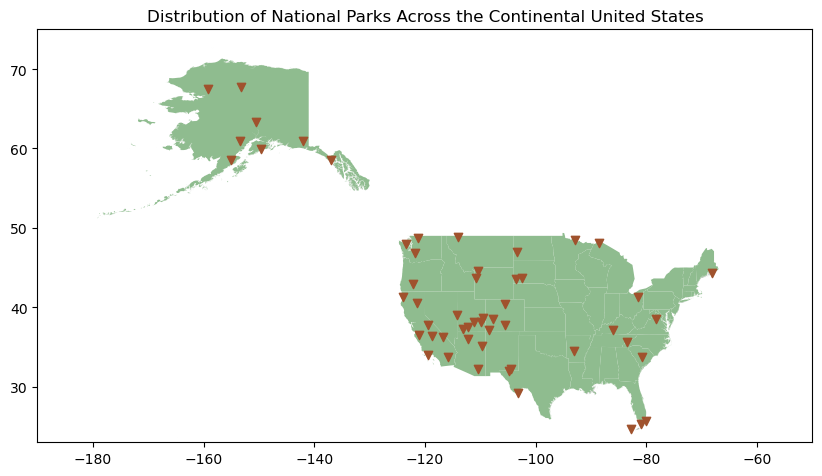

In [6]:
#Map of national parks
fig, ax = plt.subplots(figsize=(10, 10))
usa.plot(ax=ax, color = 'darkseagreen')
ax.scatter(data = parks, x = 'Longitude', y = 'Latitude', marker = 'v', color = 'sienna') 
ax.set_ylim(23, 75)
ax.set_xlim(-190, -50)
ax.set_title('Distribution of National Parks Across the Continental United States')
fig.savefig("usa_alaska_parks.jpg")

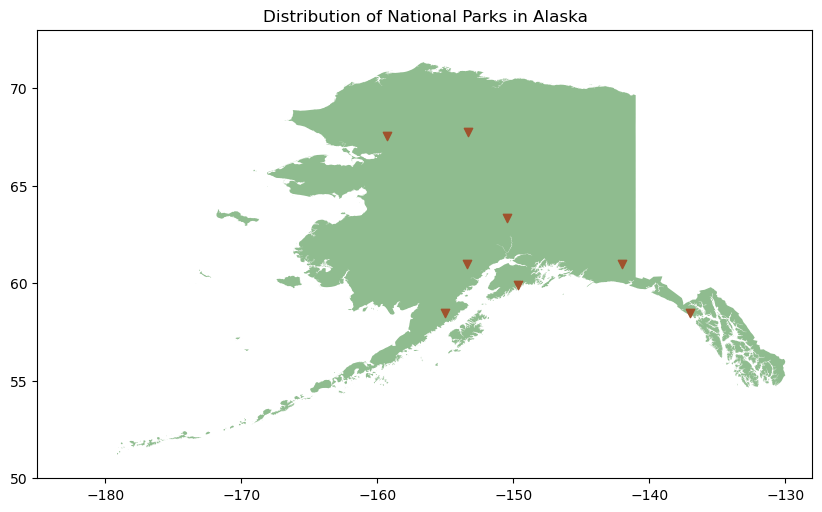

In [7]:
#Map of parks in Alaska
fig, ax = plt.subplots(figsize=(10, 10))
usa.plot(ax=ax, color = 'darkseagreen')
ax.scatter(data = parks, x = 'Longitude', y = 'Latitude', marker = 'v', color = 'sienna') 
ax.set_ylim(50, 73)
ax.set_xlim(-185, -128)
ax.set_title('Distribution of National Parks in Alaska')
fig.savefig("alaska_parks.jpg")

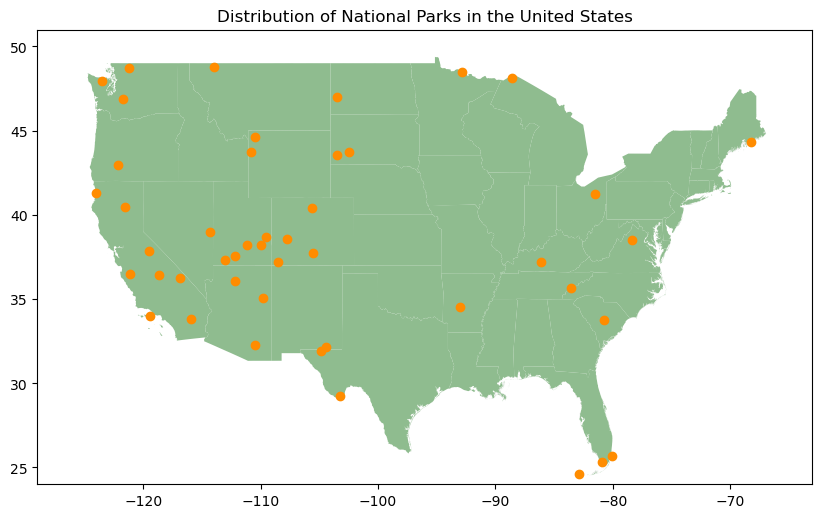

In [8]:
#Map or parks in USA proper
fig, ax = plt.subplots(figsize=(10, 10))
usa.plot(ax=ax, color = 'darkseagreen')
ax.scatter(data = parks, x = 'Longitude', y = 'Latitude', marker = 'o', \
color = 'darkorange') 
ax.set_ylim(24, 51)
ax.set_xlim(-129, -63)
ax.set_title('Distribution of National Parks in the United States')
fig.savefig("usa_parks.jpg")

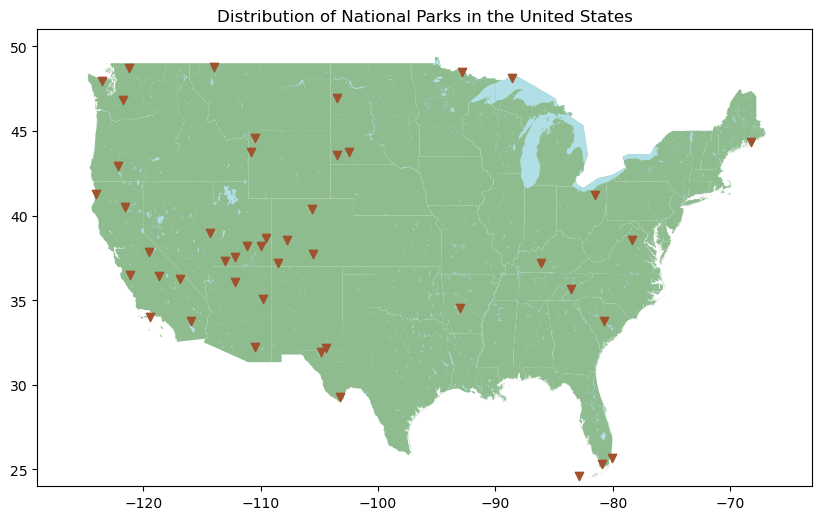

In [9]:
#Same map w/ water
fig, ax = plt.subplots(figsize=(10, 10))
usa.plot(ax=ax, color = 'darkseagreen')
usa_water.plot(ax=ax, color = 'powderblue')
ax.scatter(data = parks, x = 'Longitude', y = 'Latitude', marker = 'v', color = 'sienna') 
ax.set_ylim(24, 51)
ax.set_xlim(-129, -63)
ax.set_title('Distribution of National Parks in the United States')
fig.savefig("usa_water_parks.jpg")

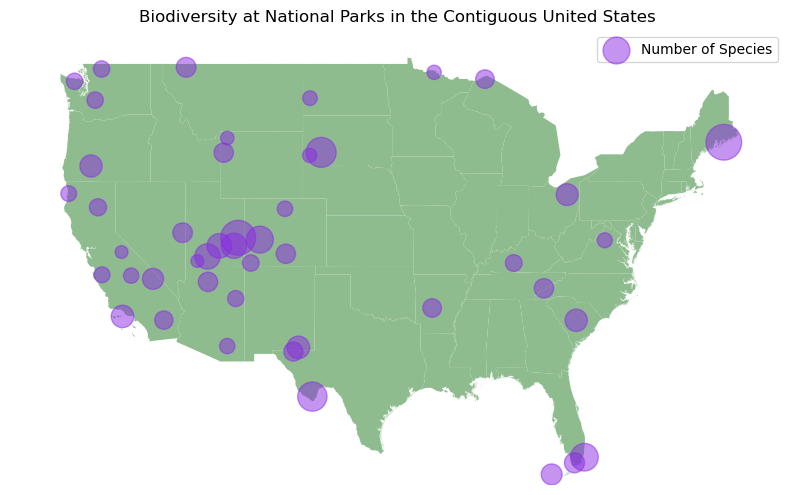

In [10]:
#Map of Biodiversity
fig, ax = plt.subplots(figsize=(10, 10))
usa.plot(ax=ax, color = 'darkseagreen')
ax.scatter(data = parks, x = 'Longitude', y = 'Latitude', marker = 'o', \
color = 'blueviolet', s = (park_totals['Species ID'] * .1), alpha = .5, label = 'Number of Species') 
ax.set_ylim(24, 51)
ax.set_xlim(-129, -63)
ax.set_title('Biodiversity at National Parks in the Contiguous United States') 
ax.axis('off')
ax.legend()
fig.savefig("usa_parks_biodiversity.jpg")

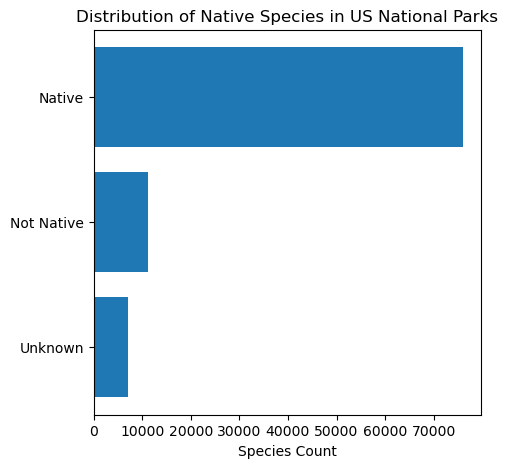

In [11]:
#Map of distribution of native species
fig, ax = plt.subplots(figsize=(5, 5))
nativity_totals = species.groupby('Nativeness').count().sort_values(by = 'Species ID', ascending = False).reset_index()
nativity_totals = nativity_totals.drop([3,4], axis = 0)
nativity = nativity_totals['Nativeness']
nativity_count = nativity_totals['Species ID']
plt.barh(nativity, nativity_count)
plt.gca().invert_yaxis()
plt.title('Distribution of Native Species in US National Parks')
plt.xlabel('Species Count')
plt.savefig("nativity_distribution.jpg")

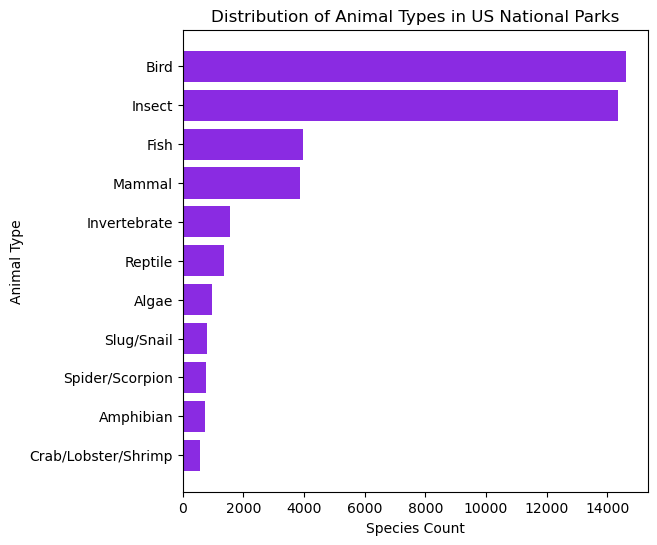

In [12]:
#Map of distribution of animal types
fig, ax = plt.subplots(figsize=(6, 6))
category_totals = species.groupby('Category').count().sort_values(by = 'Species ID', ascending = False).reset_index() 
animal_totals = category_totals.drop([0,3,4], axis = 0)
plant_totals = category_totals.iloc[[0,3,4], :]
animal_categories = animal_totals['Category'] 
animal_totals = animal_totals['Species ID']
plt.barh(animal_categories, animal_totals, color = 'blueviolet') 
plt.gca().invert_yaxis()
plt.title('Distribution of Animal Types in US National Parks') 
plt.xlabel('Species Count')
plt.ylabel('Animal Type')
plt.savefig("animals_distribution.jpg")

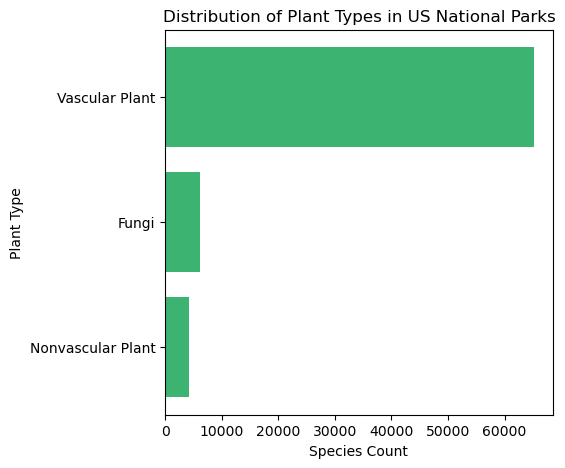

In [13]:
#Map of distribution of plant types
fig, ax = plt.subplots(figsize=(5, 5)) 
plant_categories = plant_totals['Category']
plant_totals = plant_totals['Species ID']
plt.barh(plant_categories, plant_totals, color = 'mediumseagreen') 
plt.gca().invert_yaxis()
plt.title('Distribution of Plant Types in US National Parks') 
plt.xlabel('Species Count')
plt.ylabel('Plant Type')
plt.savefig("plants_distribution.jpg")

In [14]:
#Data clearning for plants and animals
animals = species.loc[species['Category'].isin(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Spider/Scorpion', 'Insect', 'Invertebrate','Crab/Lobster/Shrimp', 'Slug/Snail'])]
plants = species.loc[species['Category'].isin(['Vascular Plant', 'Nonvascular Plant', 'Fungi'])]
animal_counts = animals.groupby('Park Name').count() 
plant_counts = plants.groupby('Park Name').count()

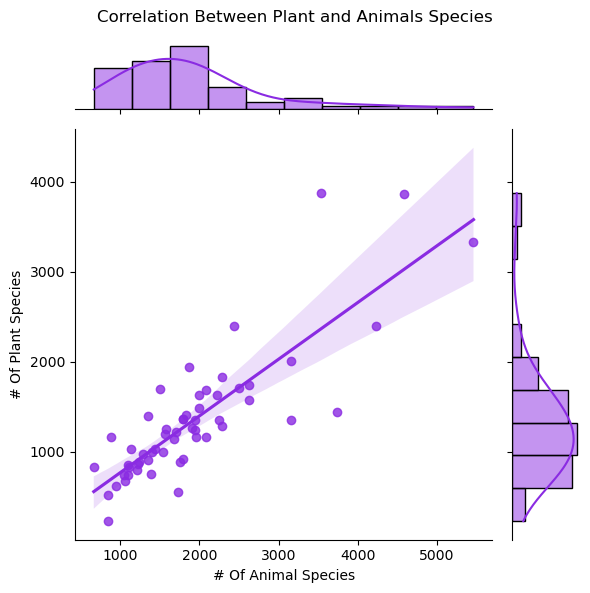

In [15]:
#Map of plants vs. animals
x = sns.jointplot(x = animal_counts['Species ID'], y = plant_counts['Species ID'], kind = 'reg' , color = 'blueviolet')
x.set_axis_labels('# Of Animal Species', '# Of Plant Species')
x.fig.suptitle('Correlation Between Plant and Animals Species')
x.fig.tight_layout()
fig.savefig("plants_animals.jpg")

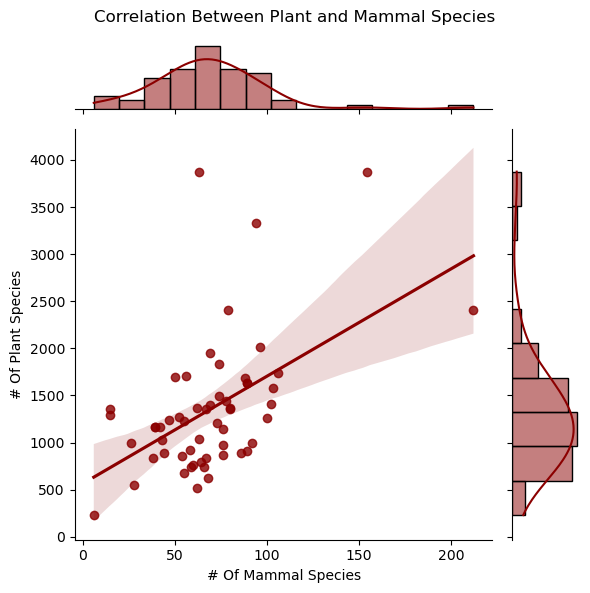

In [16]:
#Plot of mammal/plant species
x = sns.jointplot(x = mammal_totals['Species ID'], y = plant_counts['Species ID'], kind = 'reg' , color = 'darkred') 
x.set_axis_labels('# Of Mammal Species', '# Of Plant Species')
x.fig.suptitle('Correlation Between Plant and Mammal Species')
x.fig.tight_layout()
fig.savefig("plants_mammals.jpg")

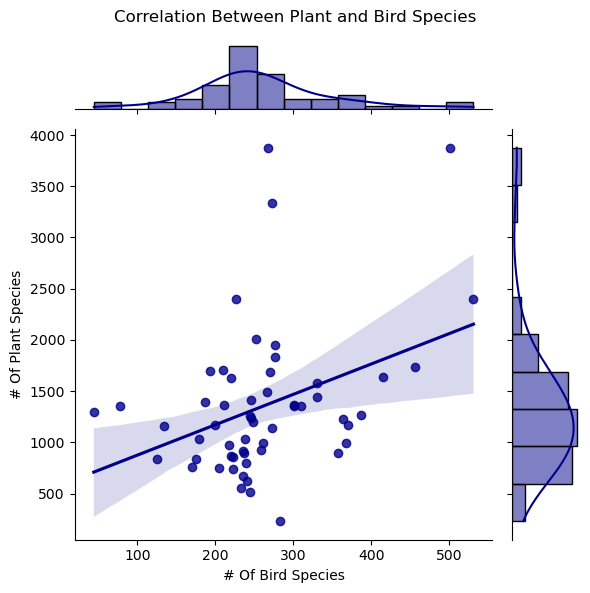

In [17]:
#Plot of bird/plant species
x = sns.jointplot(x = bird_totals['Species ID'], y = plant_counts['Species ID'], kind = 'reg' , color = 'darkblue') 
x.set_axis_labels('# Of Bird Species', '# Of Plant Species')
x.fig.suptitle('Correlation Between Plant and Bird Species')
x.fig.tight_layout()
fig.savefig("plants_birds.jpg")

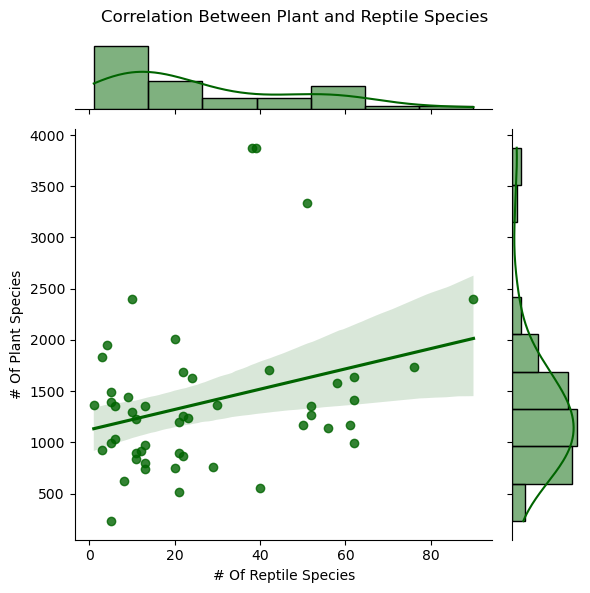

In [18]:
#Plot of reptile/plant species
x = sns.jointplot(x = reptile_totals['Species ID'], y = plant_counts['Species ID'], kind = 'reg' , color = 'darkgreen') 
x.set_axis_labels('# Of Reptile Species', '# Of Plant Species')
x.fig.suptitle('Correlation Between Plant and Reptile Species')
x.fig.tight_layout()
fig.savefig("plants_reptiles.jpg")

In [19]:
#Data cleaning for proportions
park_totals = park_totals = species.groupby('Park Name').count()
native_species = species.loc[species['Nativeness'].isin(['Native'])]
native_totals = native_species.groupby('Park Name').count()
park_totals['Proportion Native'] = native_totals['Species ID']/park_totals['Species ID']
at_risk = species.loc[species['Conservation Status'].isin(['Species of Concern', 'Endangered', 'In Recovery', 'Threatened', 'Under Review', 'Proposed Threatened', 'Extinct', 'Proposed Endangered'])]
risk_totals = at_risk.groupby('Park Name').count()
park_totals['Proportion At Risk'] = risk_totals['Species ID']/park_totals['Species ID']

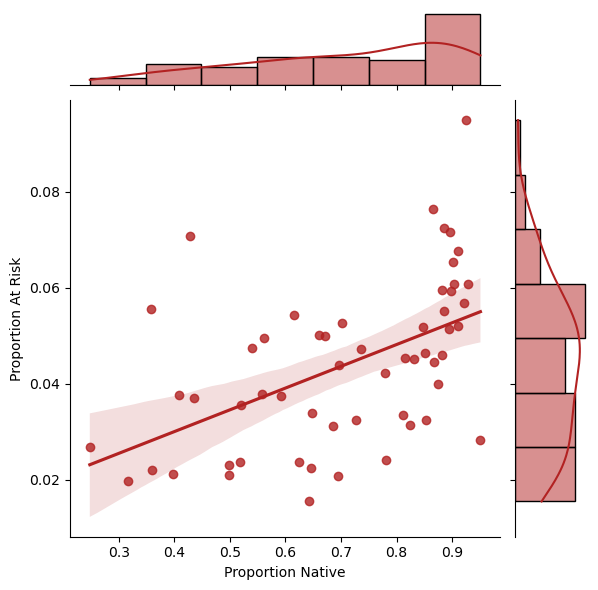

In [20]:
#Joint plot of native vs. risk
sns.jointplot(x = park_totals['Proportion Native'], y = park_totals['Proportion At Risk'], kind = 'reg', color = 'firebrick')
fig.savefig("native_risk.jpg")

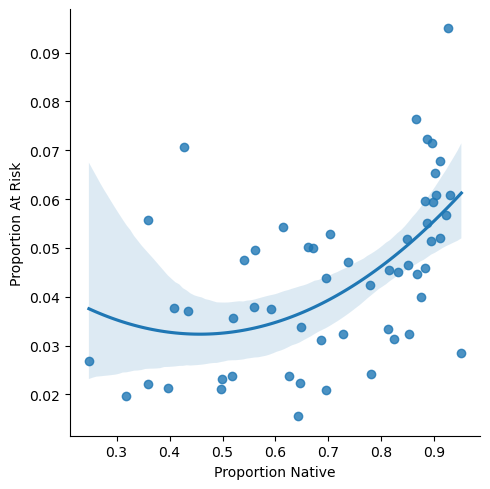

In [21]:
#LM plot of native vs. risk
sns.lmplot(x = 'Proportion Native', y = 'Proportion At Risk', data = park_totals, order = 2) 
plt.savefig("native_risk_2.jpg")

### PCA

Continuing our exploratory data analysis, we also conducted Principal Component Analysis of our data (specifically the quantity of different plant and animal species, and the area of each national park). Our PCA analysis yielded a graph of the first two principal components as follows:

In [22]:
pca_df = df.groupby(['Park Name', 'Category'])[['Acres', 'Latitude', 'Longitude','Order']]\
    .agg(Order=('Order','count'), \
         Latitude=('Latitude', 'mean'),\
         Longitude=('Longitude', 'mean'),\
         Acres=('Acres', 'mean'))\
    .reset_index()\
    .pivot(index='Park Name', columns=['Category'], values=['Order'])\
    .fillna(0)

pca_df.columns = pca_df.columns.droplevel(0)

merge_df = df.loc[:,['Park Name','Acres', 'Latitude', 'Longitude']].set_index('Park Name')
merge_df = merge_df.groupby('Park Name').agg(Acres=('Acres','mean'))
                                  # Latitude=('Latitude', 'mean'),\
                                  # Longitude=('Longitude', 'mean'))
                                  # Conservation_Status=('Conservation Status', 'count'))


merge_df

pca_df = pca_df.merge(merge_df, on='Park Name', how='left')

In [23]:
df_standardized = (pca_df - np.mean(pca_df, axis=0)) / np.std(pca_df, axis=0)
df_standardized
df_standardized.var()
u, s, vt = np.linalg.svd(df_standardized, full_matrices=False)

pcs = pd.DataFrame(df_standardized @ vt.T).rename(columns={0:'pc1', 1:'pc2', 2:'pc3', 3:'pc4', 4:'pc5', 5:'pc6',\
                                                          6:'pc7', 7:'pc8', 8:'pc9', 9:'pc10', 10: 'pc11', 11: 'pc12',\
                                                          12: 'pc12', 13: 'pc14', 14: 'pc15', 15: 'pc16', 16: 'pc17',})
pcs_jittered = pcs + np.random.normal(loc=0.0, scale=1.0, size=pcs.shape)

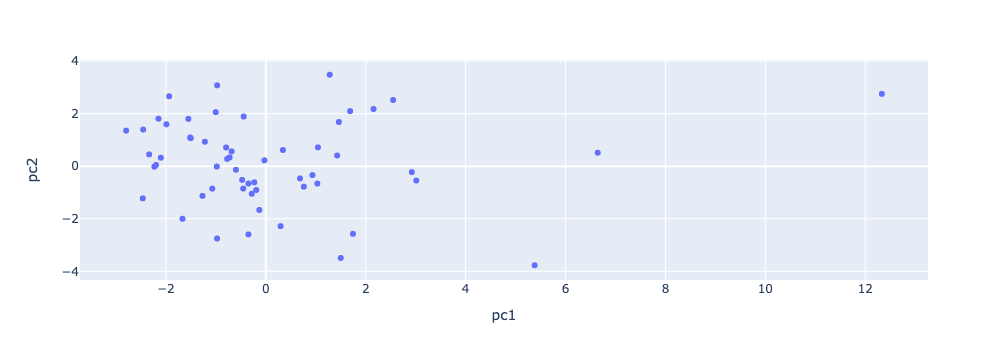

In [24]:
pcs_jittered['Park'] = pca_df.index
fig = px.scatter(pcs_jittered, x="pc1", y="pc2",
                hover_data={"Park": True}); 

fig.show(); 

In [25]:
df_standardized.loc[['Hawaii Volcanoes National Park', \
                    'Rocky Mountain National Park', \
                    'Death Valley National Park', \
                     'Grand Canyon National Park', \
                    ], :]

Algae  Amphibian      Bird  \
Park Name                                                       
Hawaii Volcanoes National Park -0.370117  -0.664874 -2.057414   
Rocky Mountain National Park    2.825227  -0.593134  0.183382   
Death Valley National Park      0.903702   4.141691  3.043493   
Grand Canyon National Park     -0.370117   0.124264  2.198972   

                                Crab/Lobster/Shrimp      Fish     Fungi  \
Park Name                                                                 
Hawaii Volcanoes National Park             1.991333 -0.496480 -0.456099   
Rocky Mountain National Park               1.210600 -0.436865  0.926814   
Death Valley National Park                 1.210600 -0.459221  0.051910   
Grand Canyon National Park                -0.437613 -0.310183 -0.489026   

                                  Insect  Invertebrate    Mammal  \
Park Name                                                          
Hawaii Volcanoes National Park  2.538806      2.700183 -1.695342   
Rocky Mountain National Park    0.905976      0.375588  0.155752   
Death Valley National Park      1.413477     -0.256702  4.454053   
Grand Canyon National Park     -0.422353     -0.461266  1.159735   

                                Nonvascular Plant   Reptile  Slug/Snail  \
Park Name                                                                 
Hawaii Volcanoes National Park           0.442232 -0.485140    2.059792   
Rocky Mountain National Park             2.484784 -0.931980   -0.133425   
Death Valley National Park              -0.410701  2.955527    2.096965   
Grand Canyon National Park              -0.567821  2.329951   -0.430810   

                                Spider/Scorpion  Vascular Plant     Acres  
Park Name                                                                  
Hawaii Volcanoes National Park         2.680916        0.104309 -0.356862  
Rocky Mountain National Park           0.232291       -0.091032 -0.390867  
Death Valley National Park             0.568977        2.221555  2.250971  
Grand Canyon National Park             3.905228        1.219644  0.170889

The park with the highest PC1 score is Redwood National Park, which has much higher values for number of species in each animal category than every other national park. Conversely, the park with the lowest PC1 score, Black Canyon of the Gunnison National Park, has much lower species diversity scores. Therefore, we interpret PC1 as reflecting overall species diversity in each national park. There seems to be strong clustering around a score of plus and minus 2 for PC1, with four parks with large positive outliers.

For PC2, we compare Hawaii Volcanoes National Park, which has the highest PC2 score, with Death Valley National Park, which has the lowest PC2 score. Death Valley has a much larger area compared to Hawaii Volcanoes. Furthermore, Death Valley has far above average numbers of vascular plant species and below average non-vascular plant species, while Hawaii Volcanoes has below average quantity of vascular plant species, and above average quantity of non-vascular plant species. Therefore, we interpret PC2 to indicate the size of the park, as well as some information about the type of flora and fauna in the park.

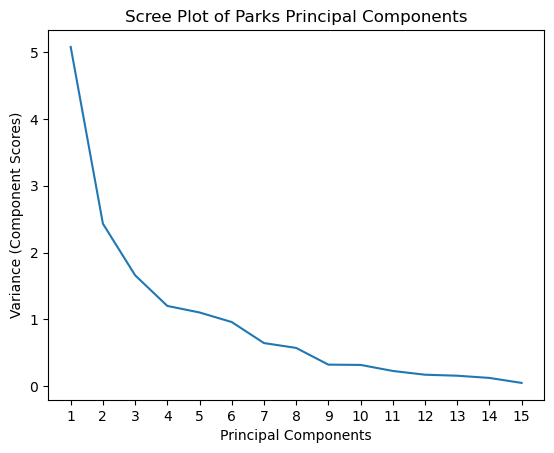

In [26]:
ticks = [x+1 for x in range(len(s**2))]
plt.plot(ticks, s**2/df_standardized.shape[0])
plt.xticks(ticks)
plt.xlabel("Principal Components")
plt.ylabel("Variance (Component Scores)")
plt.title("Scree Plot of Parks Principal Components");

A scree plot of each principal component shows that the first two principal components account for about 70% of the variance in the data overall. While there seem to be other important factors captured by the other principal components, the quantity of variance they capture is much smaller than the first two principal components, and interpretation becomes much more difficult past the first two principal components.

### Linear Regression

Next, we build a linear regression model trying to accurately predict the proportion of "species of no concern," which is the inverse of "speices of concern" (e.g. threatened, endangered, extinct and other categories). From our PCA analysis, we know much of the variance in the data is accounted for by variables like park size, vascular and non-vascular plant species, and overall species abundance, so we start with those variables.

In addition, below we construct a correlation matrix of all of our variables to identify any strong correlations. Many of the speices abundance variables are strongly correlated with our proportion no concern variable (positively and negatively), which is a good sign that reflects our PCA analysis. 

Additionally, many of the variables reflecting whether a species if threatened, endangered or extinct are correlated with species no concern, but our outcome variable is essentially a linear transformation of these variables, so we leave them out of our model. Their inclusion may reduce the error of our model, but also make the model less meaningful. We'd rather be able to say something about the connection between park size and species abundance and level of species of concern, rather than say there's a lot of species of concern if many of them are endangered (which is essentially just repeating ourselves).

We constructed training and test sets of our data with random index shuffling and using 80% of the data to train, and 20% to test. Our N of 56 is somewhat small for this, but we are limited by the number of national parks nationally. Our training set consists of 44 national parks and our test set consists of 12 national parks.

In [27]:
df.loc[:, 'Conservation Status'].fillna('No Concern').value_counts()
df = df.fillna({'Conservation Status': 'No Concern'})
conservation = df.groupby(['Park Name','Conservation Status'])\
                 .agg('count')\
                 .reset_index()\
                 .pivot(index='Park Name', columns=['Conservation Status'], values=['Park Code'])\
                 .fillna(0)

conservation.columns = conservation.columns.droplevel(0)

conservation['Total'] = conservation.apply(np.sum, axis=1)
conservation['Proportion No Concern'] = (conservation['No Concern'] / conservation['Total'] * 100)

In [28]:
reg_df = pca_df.merge(conservation, on='Park Name')
reg_df = reg_df.reset_index()
reg_df.to_csv('regression_data.csv', index=False)

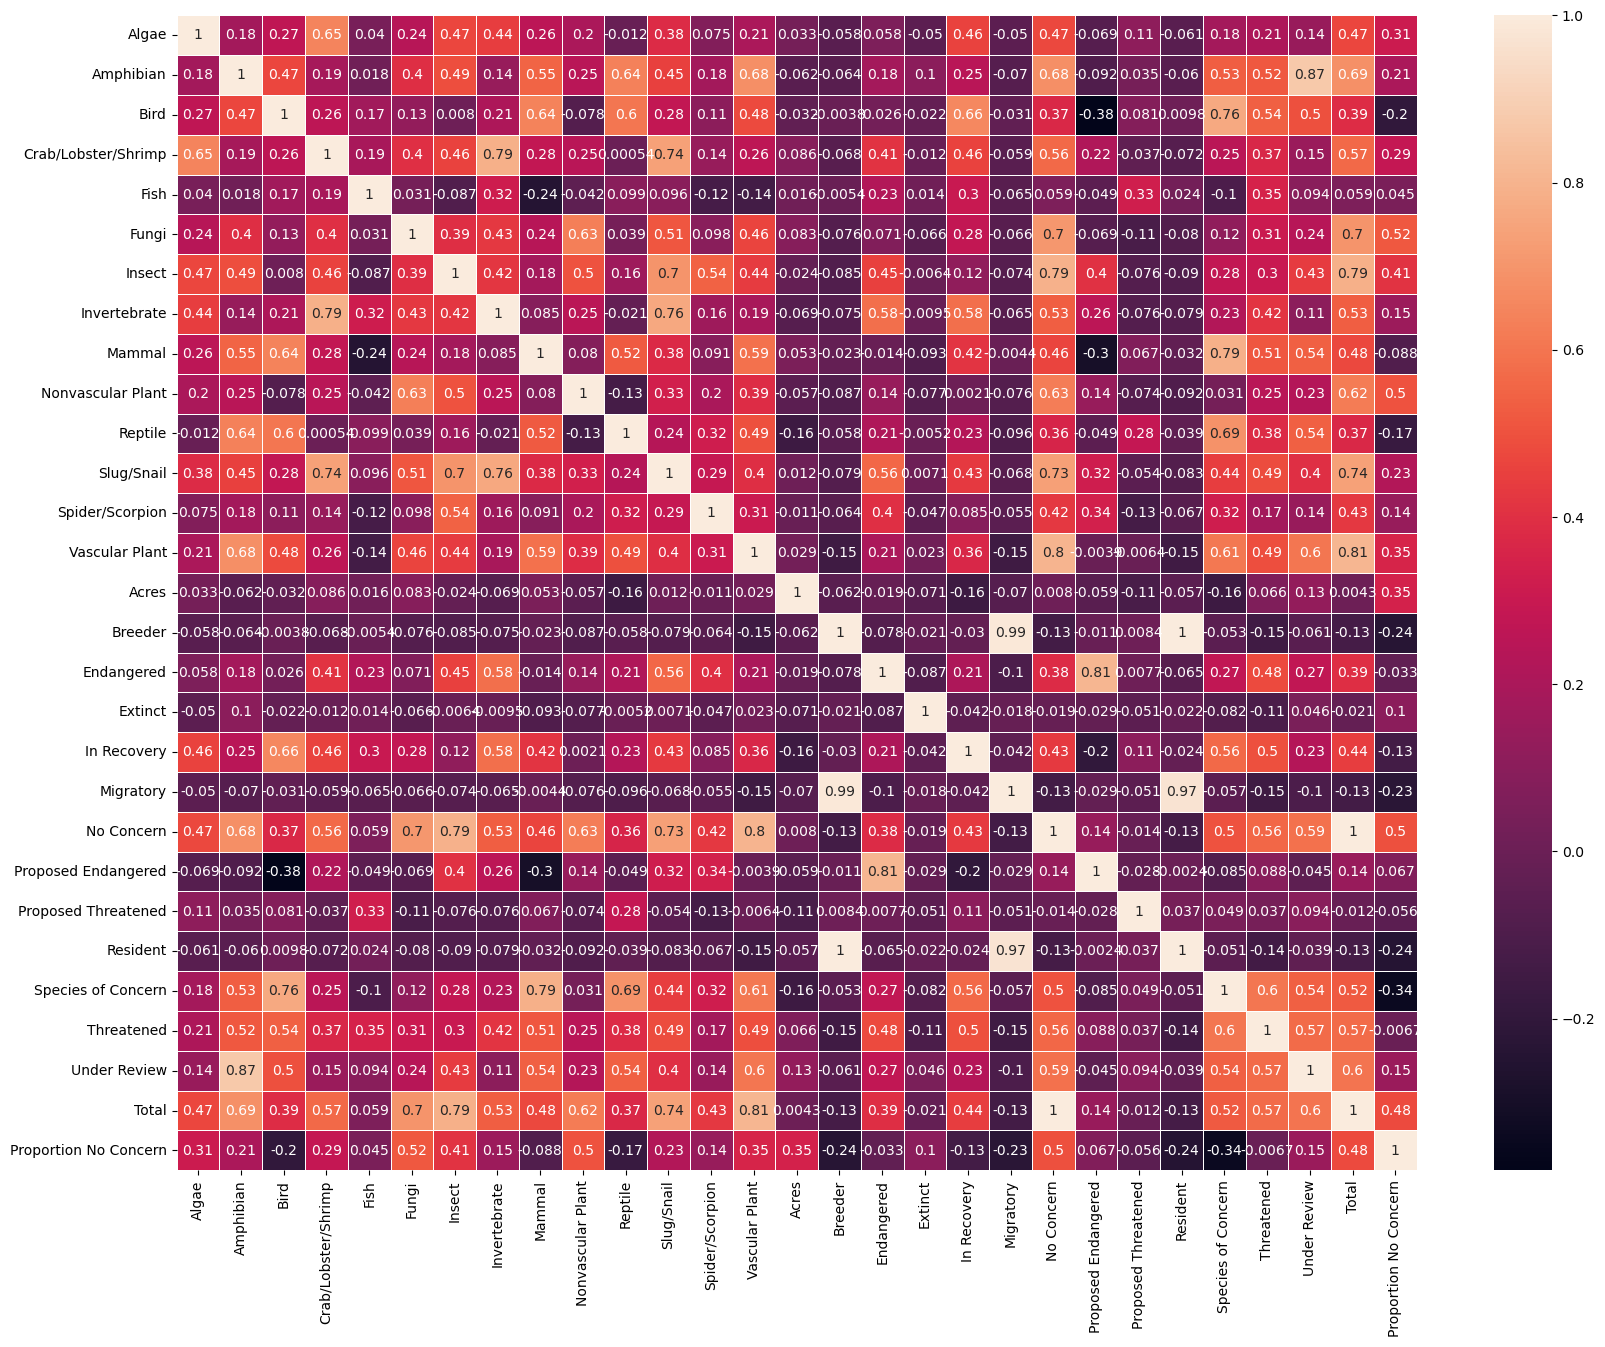

In [29]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(reg_df.corr(), annot=True, linewidth=0.5)

In [30]:
def train_test_split(data):
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    train_indices = shuffled_indices[:int(.8*data_len)]
    test_indices = shuffled_indices[int(.8*data_len):]
    return data.iloc[train_indices], data.iloc[test_indices]

In [31]:
np.random.seed(1337)
train, test = train_test_split(reg_df)
train.shape, test. shape

((44, 30), (12, 30))

In [32]:
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

In [33]:
def run_pipeline(pipeline, data):
    for function, arguments, keyword_arguments in pipeline:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments): 
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    return data

In [35]:
def process_data_fm(data, is_test_set=False):
    features = [
        'Proportion No Concern',\
        'Algae',\
        'Amphibian',\
        'Bird', \
        'Crab/Lobster/Shrimp', \
        'Fish', \
        'Fungi',\
        'Insect',\
        'Invertebrate',\
        'Mammal',\
        'Nonvascular Plant',\
        'Reptile',\
        'Slug/Snail',\
        'Spider/Scorpion',\
        'Vascular Plant',\
        'Acres',\
        
        # These variables left out of the model because they are linear transformations of the outcome variable
        
        # 'Breeder',\
        # 'Endangered',\
        # 'Extinct', \
        # 'In Recovery', \
        # 'Migratory', \
        # 'No Concern', \
        # 'Proposed Endangered', \
        # 'Proposed Threatened', \
        # 'Resident', \
        # 'Species of Concern', \
        # 'Threatened', \
        # 'Under Review', \
        # 'Total', \
    ]
    
    training_transformations = [
        
    
    ]
    
    test_transformations = [
    
    ]
    
    if not is_test_set:
        training_pipeline = test_transformations + training_transformations + [(select_columns, features, None)]
        data = run_pipeline(training_pipeline, data)
    else:
        test_pipeline = test_transformations + [(select_columns, features[1:], None)]
        data = run_pipeline(test_pipeline, data)
        
        # Return predictors and response variables separately
    if is_test_set:
        X = data
        X = X.replace([np.inf, -np.inf],0)
        ... # any other processing you wish to do
        return X
    else:
        X = data.drop(['Proportion No Concern'], axis = 1) # Need to update this with parks predictor
        X = X.replace([np.inf, -np.inf],0)
        y = data.loc[:, 'Proportion No Concern'] # Need to update this with parks predictor
        ... # any other processing you wish to do
        return X, y
   
training_data = train
test_data = test
X_train, Y_train = process_data_fm(training_data)
X_test = process_data_fm(test_data, is_test_set = True)

model = lm.LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)


y_predicted = model.predict(X_train)
loss = rmse(y_predicted, Y_train)

y_predicted_test = model.predict(X_test)
y_actual_test = test_data['Proportion No Concern']
loss_test = rmse(y_predicted_test, y_actual_test)

features = [
    'Algae',\
    'Amphibian',\
    'Bird', \
    'Crab/Lobster/Shrimp', \
    'Fish', \
    'Fungi',\
    'Insect',\
    'Invertebrate',\
    'Mammal',\
    'Nonvascular Plant',\
    'Reptile',\
    'Slug/Snail',\
    'Spider/Scorpion',\
    'Vascular Plant',\
    'Acres',\
    ]

display(Markdown('#### Model results:'))
display(Markdown('##### Training Loss: {}'.format(np.round(loss, decimals=2))))
display(Markdown('##### Test Loss: {}'.format(np.round(loss_test, decimals=2))))
display(Markdown('##### Intercept: {}'.format(np.round(model.intercept_, decimals=2))))
md_list = ["|parameter|coefficient|value|",
           "----|----|----|"]
md_list += [fr"{parameter}|$\theta_{i}$|{coef}" for i, (parameter, coef) in enumerate(zip(features, model.coef_))]
display(Markdown('\n'.join(md_list)))

#### Model results:

##### Training Loss: 0.99

##### Test Loss: 1.28

##### Intercept: 96.13

|parameter|coefficient|value|
----|----|----|
Algae|$\theta_0$|0.017080266761311448
Amphibian|$\theta_1$|0.02372681014573257
Bird|$\theta_2$|-0.008182006169933247
Crab/Lobster/Shrimp|$\theta_3$|0.00852809092195267
Fish|$\theta_4$|0.0020105617687573847
Fungi|$\theta_5$|0.0026774912986412803
Insect|$\theta_6$|-0.0013059915935493534
Invertebrate|$\theta_7$|-0.011976918552539462
Mammal|$\theta_8$|-0.02230749925637427
Nonvascular Plant|$\theta_9$|-0.0006115687447463023
Reptile|$\theta_10$|-0.016507249257062737
Slug/Snail|$\theta_11$|0.013921490762365965
Spider/Scorpion|$\theta_12$|0.008719814657114399
Vascular Plant|$\theta_13$|0.0020129013798131142
Acres|$\theta_14$|4.181678157147428e-07

Our linear regression model output is summarized in the above figure. Our training loss is 0.99 (for np.random.seed(1337)), and our test loss is 1.28. This means that our prediction was off by about 1% (raw value) for our training data and 1.28% for our test data. Including the variables omitted above (e.g. the linear transformations of the outcome variable) reduces training error to ~0.4-0.5, but increases training error to ~1.4-1.5. We interpret this to mean we're avoiding model overfitting by excluding these variables. Being off by 1%/1.25% is reasonable, but actually means we're off by about 25% (relative value) considering we are predicting the inverse of % species at risk. Since the average number of species of risk in our dataset is 4.42%. Next steps to improve the model would be adding in additional data on specific risk factors for park species (which our dataset did not include), as well as identifying linear transformations of our features to reduce error.

Interesting observations on our results include:
* The beta coefficients on each parameter are small. This makes sense because that reflects the percent change in proportion of species of concern associated with a one unit change in number of species of that type. For instance, the coefficient on Mammal is -0.0223. Our interpretation of this value is that an increase of one Mammal species in a park is associated with a 0.0223% increase in species of concern (since we are predicting proportion of species of no concern, a negative value is assocaited with an increase in species of concern). That's actually a rather large value in context, because there are so many species in each park, and the vast majority are not threatened, endangered or extinct.
* Some species are associated with an increase in species of concern, while others are associated with a decrease. For instance, the coefficients on Mammal, Bird, Insect, Invertibrate, Nonvascular Plant, and Reptile are negative, meaning these species types are more likely to be threatened, endangered, or extinct. Conversely, Algae, Amphibian, Crab/Lobster/Shrimp, Fish, Slug/Snail, Spider/Scorpion, and Vascular Plant are positive and less likely to be a species of concern. 
* The coefficient on park size, Acres, is a small, but positive value. We interpret this to reflect the fact that large parks likely have more species overall and more species diversity. While they still have species of concern, raw size of the park is not strongly associated with a change in proportion of species of concern. It is also possible that smaller parks are more threatened overall since they may be closer to civilization.

#### References

* Beissinger, Steven R., David D. Ackerly, Holly D. Doremus, Gary E. Machlis, Berkeley University of California, National Geographic Society, and United States National Park Service. “Science, Conservation, and National Parks.” Chicago ; The University of Chicago Press, 2017.
* Gonzalez, Patrick, Fuyao Wang, Michael Notaro, Daniel J. Vimont, and John W. Williams. “Disproportionate Magnitude of Climate Change in United States National Parks.” Environmental Research Letters 13, no. 10 (2018): 104001-.
* “National Park Service | USAGov.” Accessed December 5, 2022. https://www.usa.gov/federal-agencies/national-park-service.